In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


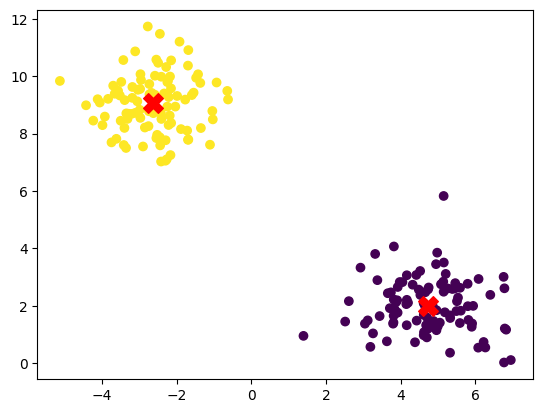

In [3]:
X, y = make_blobs(n_samples=200, centers=2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.show()


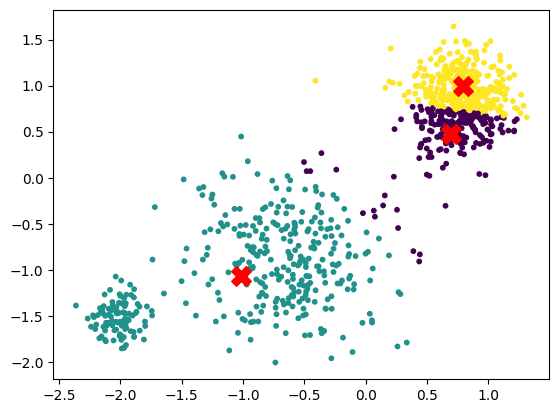

In [4]:
X, y = make_blobs(n_samples=[100, 300, 500], centers=[[-5, -2], [0, 0], [5, 5]], cluster_std=[0.5, 1.5, 0.8], random_state=42)
X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.show()


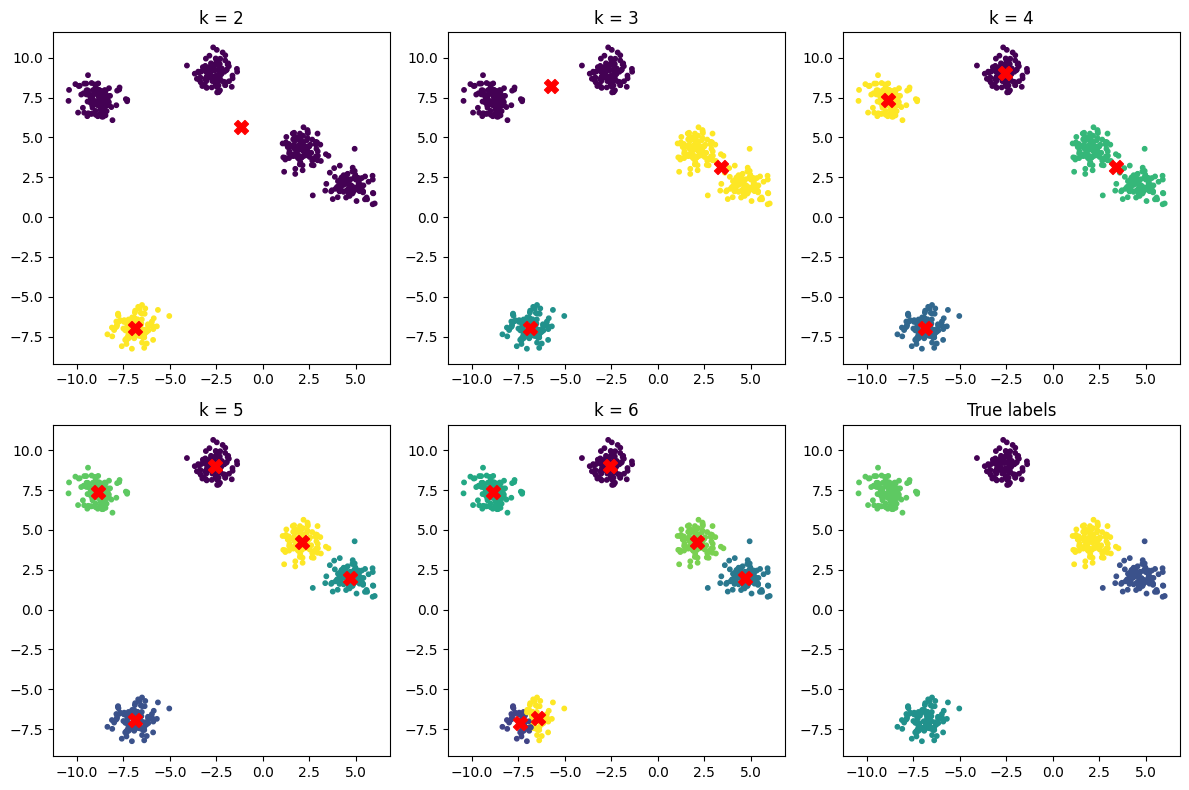

In [5]:
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, k in enumerate(range(2, 7)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ax = axes[i // 3, i % 3]
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')
    ax.set_title(f'k = {k}')
ax = axes[1, 2]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
ax.set_title('True labels')
plt.tight_layout()
plt.show()


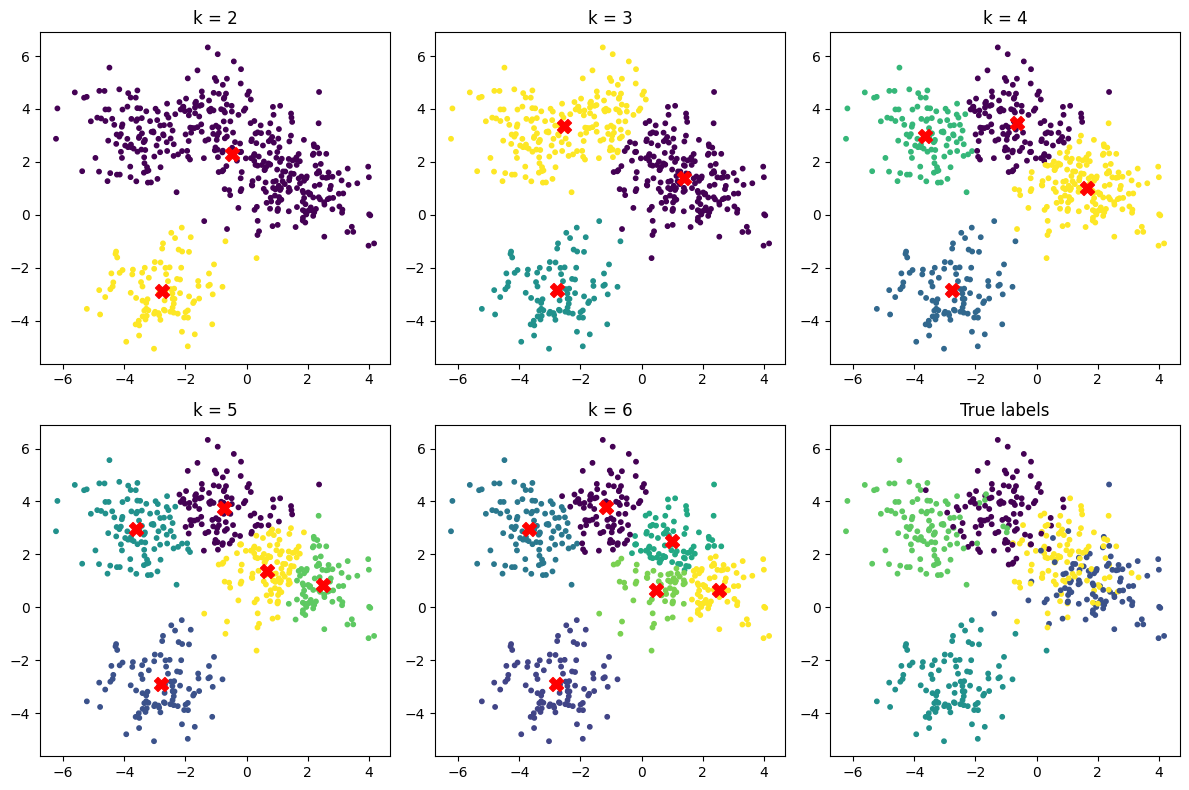

In [6]:
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1, center_box=(-4, 4), random_state=42)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, k in enumerate(range(2, 7)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ax = axes[i // 3, i % 3]
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')
    ax.set_title(f'k = {k}')
ax = axes[1, 2]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
ax.set_title('True labels')
plt.tight_layout()
plt.show()


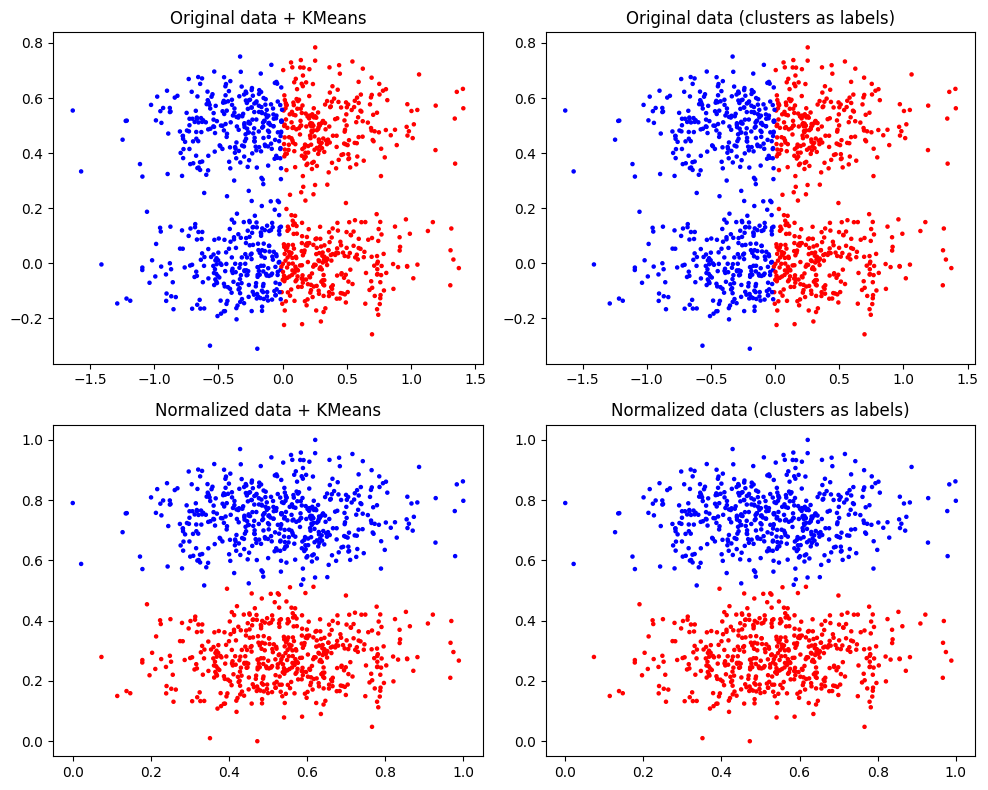

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

rnorm = np.random.randn

x = rnorm(1000) / 2
y = np.concatenate([rnorm(500) + 5, rnorm(500)]) / 10

def normalise(vals):
    return (vals - np.min(vals)) / (np.max(vals) - np.min(vals))

xn = normalise(x)
yn = normalise(y)

km = KMeans(2, random_state=42)

clusters_orig = km.fit_predict(np.column_stack((x, y)))
clusters_norm = km.fit_predict(np.column_stack((xn, yn)))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(x, y, c=clusters_orig, cmap="bwr", s=5)
axes[0, 0].set_title("Original data + KMeans")

axes[0, 1].scatter(x, y, c=clusters_orig, cmap="bwr", s=5)
axes[0, 1].set_title("Original data (clusters as labels)")

axes[1, 0].scatter(xn, yn, c=clusters_norm, cmap="bwr", s=5)
axes[1, 0].set_title("Normalized data + KMeans")

axes[1, 1].scatter(xn, yn, c=clusters_norm, cmap="bwr", s=5)
axes[1, 1].set_title("Normalized data (clusters as labels)")

plt.tight_layout()
plt.show()
